# Bussiness Problem Understanding

Predicting if the company should give loan or not

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

In [2]:
BPU = pd.DataFrame({'Variable':['Loan ID','Gender','Married','Dependents','Education','Self_Employed','Applicantlncome',
                                'Coapplicantlncome','LoanAmount','Loan Amount Term','Credit_History',
                                'Property_Area','Loan Status'],
                    'Description':['Unique Loan ID','Male / Female','Applicant married status (Yes/No)',
                                   'Number of dependents on Applicant','Applicant Education(Graduate/Under Graduate)',
                                   'Self employed (Yes/No)','Applicant personal income',
                                   'Coapplicant income togather','Loan amount in Thousands','Term of loan in Months',
                                   'Credit history meets guidelines (Good/Bad)','Urban/ Semi-Urban/ Rural','Loan approved status (Yes/No)'] })
BPU

,Variable,Description
0,Loan ID,Unique Loan ID
1,Gender,Male / Female
2,Married,Applicant married status (Yes/No)
3,Dependents,Number of dependents on Applicant
4,Education,Applicant Education(Graduate/Under Graduate)
5,Self_Employed,Self employed (Yes/No)
6,Applicantlncome,Applicant personal income
7,Coapplicantlncome,Coapplicant income togather
8,LoanAmount,Loan amount in Thousands
9,Loan Amount Term,Term of loan in Months


**Dataset Understanding**

In [3]:
df = pd.read_csv("LoanData.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Here we can see there a 3 data types**
- object : Loan_ID	Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
- int    : ApplicantIncome  
- float  : CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

Note : Here we can observe some columns required change in data type and one coloum we can creat of total income

In [5]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

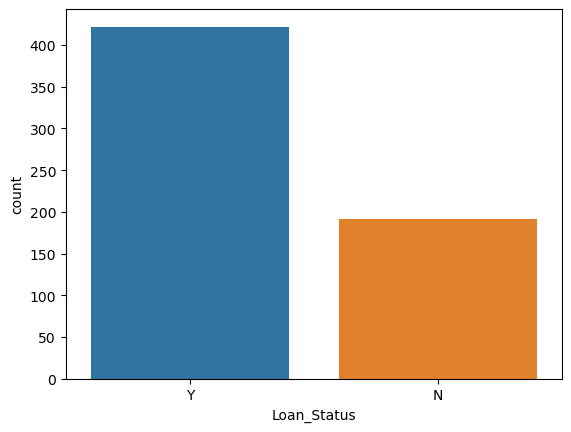

In [6]:
sns.countplot(data=df,x='Loan_Status')
plt.show()

In [7]:
df['Credit_History'] = df['Credit_History'].map({1.0 : 'good', 0.0 : 'bad'})

In [8]:
continous = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
descrit_count = df[['Dependents','Loan_Amount_Term']]
descrit_catagorical = df[['Gender','Married', 'Education','Self_Employed','Property_Area','Loan_Status','Credit_History']]

In [9]:
# pd.set_option('display.max_columns', None)
#  pd.set_option('display.max_rows', None)

**EDA (Data Exploratery Analysis)**

In [10]:
print('Dependents',df['Dependents'].value_counts())
print()
print('Loan_Amount_Term',df['Loan_Amount_Term'].value_counts())
print()
print('Credit_History',df['Credit_History'].value_counts())
print()
print('Gender',df['Gender'].value_counts())
print()
print('Married',df['Married'].value_counts())
print()
print('Education',df['Education'].value_counts())
print()
print('Self_Employed',df['Self_Employed'].value_counts())
print()
print('Property_Area',df['Property_Area'].value_counts())
print()
print('Loan_Status',df['Loan_Status'].value_counts())

Dependents Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Loan_Amount_Term Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Credit_History Credit_History
good    475
bad      89
Name: count, dtype: int64

Gender Gender
Male      489
Female    112
Name: count, dtype: int64

Married Married
Yes    398
No     213
Name: count, dtype: int64

Education Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Self_Employed Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Property_Area Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Loan_Status Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [11]:
print('Dependents',df['Dependents'].unique())
print()
print('Loan_Amount_Term',df['Loan_Amount_Term'].unique())
print()
print('Credit_History',df['Credit_History'].unique())
print()
print('Gender',df['Gender'].unique())
print()
print('Married',df['Married'].unique())
print()
print('Education',df['Education'].unique())
print()
print('Self_Employed',df['Self_Employed'].unique())
print()
print('Property_Area',df['Property_Area'].unique())
print()
print('Loan_Status',df['Loan_Status'].unique())

Dependents ['0' '1' '2' '3+' nan]

Loan_Amount_Term [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]

Credit_History ['good' 'bad' nan]

Gender ['Male' 'Female' nan]

Married ['No' 'Yes' nan]

Education ['Graduate' 'Not Graduate']

Self_Employed ['No' 'Yes' nan]

Property_Area ['Urban' 'Rural' 'Semiurban']

Loan_Status ['Y' 'N']


   - **Univariant Analysis**
   
         1. For Continous Features

In [12]:
continous.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


observation : 
    
    - mean is greater then median in all the columns which means it's right skew data
    - there is skewness so, we have to noemalize it also
    - Here coapplicant minimum value is zero , so while normalizing log may not be the best fit
            

In [13]:
continous.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

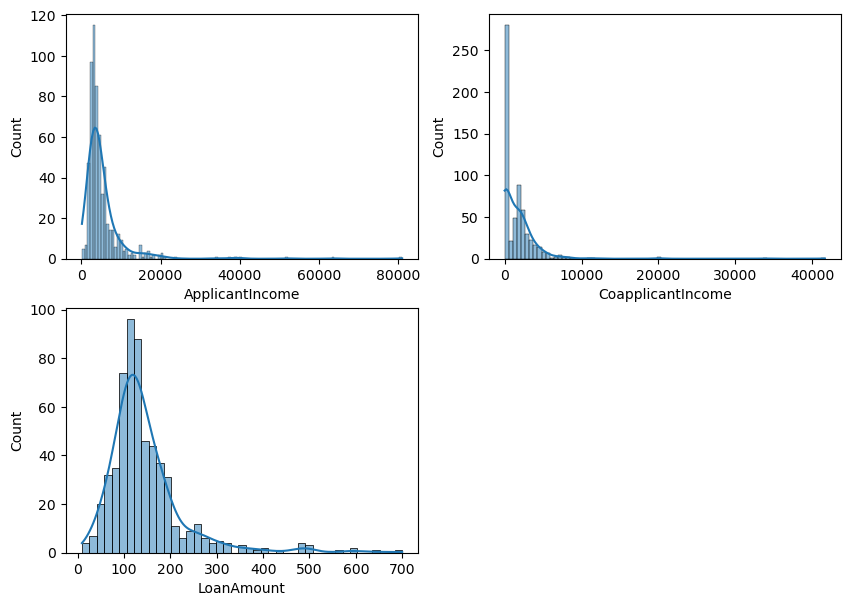

In [14]:
plt.figure(figsize=(10,7))
i = 1
for c_col in continous.columns :
    plt.subplot(2,2,i)
    sns.histplot(x = df[c_col],kde=True)
    plt.tight_layout
    i += 1
    
    
plt.show()

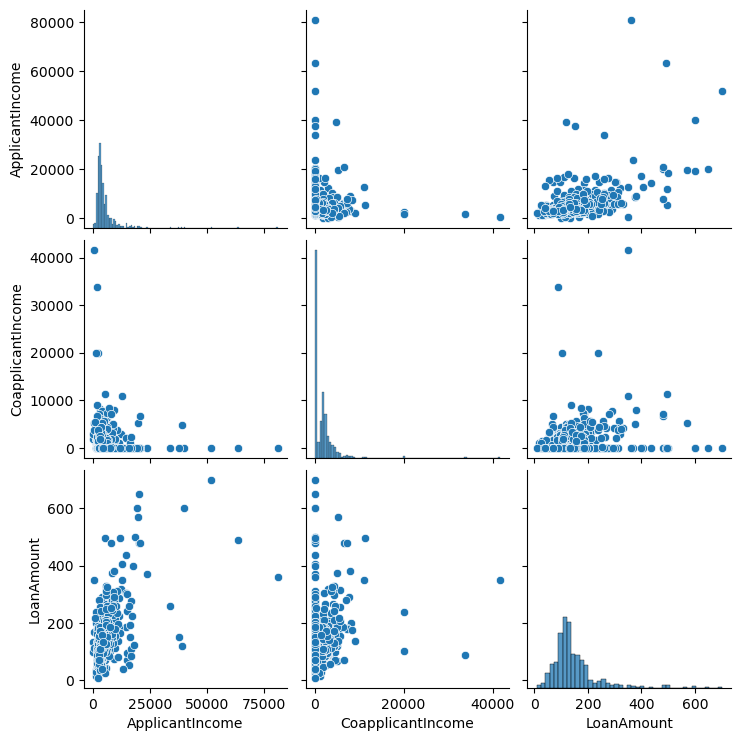

In [15]:
sns.pairplot(continous)
plt.show()

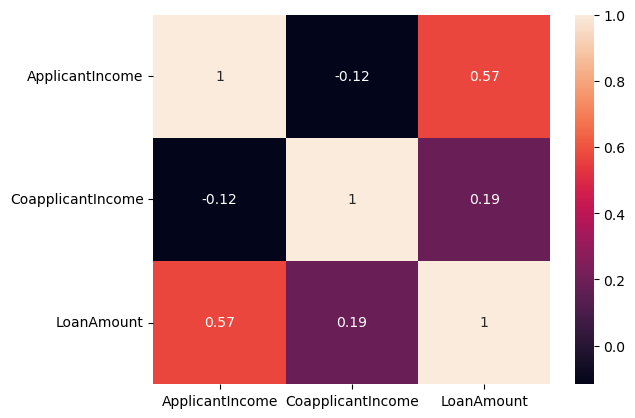

In [16]:
sns.heatmap(continous.corr(),annot=True)
plt.show()

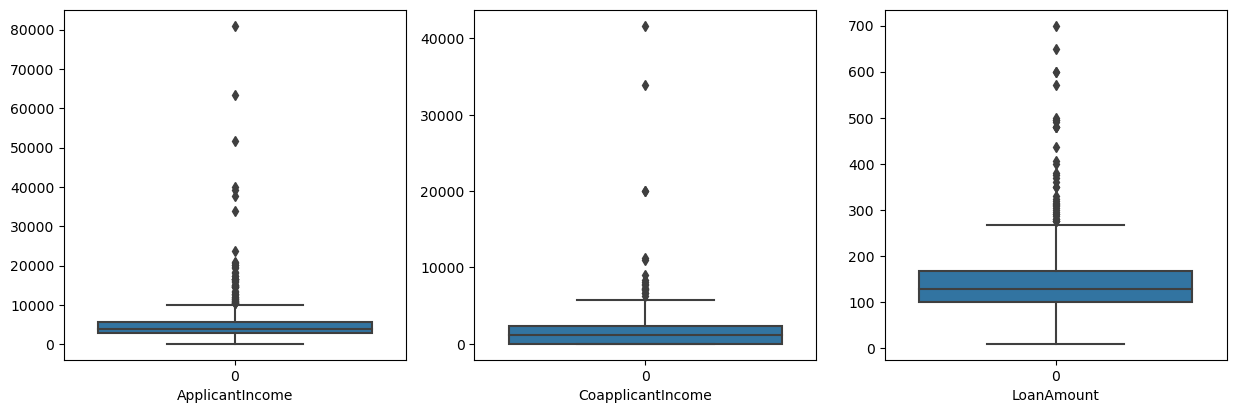

In [17]:
# checking outlires presence

plt.figure(figsize=(15,10))
i = 1 
for outlires in continous.columns:
    plt.subplot(2,3,i)
    sns.boxplot(df[outlires])
    plt.xlabel(outlires)
    i = i+1
plt.show()

There are outlires but non of them are irrelivent

- 2. For Descrit Catagorical

In [18]:
descrit_catagorical.describe()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
count,601,611,614,582,614,614,564
unique,2,2,2,2,3,2,2
top,Male,Yes,Graduate,No,Semiurban,Y,good
freq,489,398,480,500,233,422,475


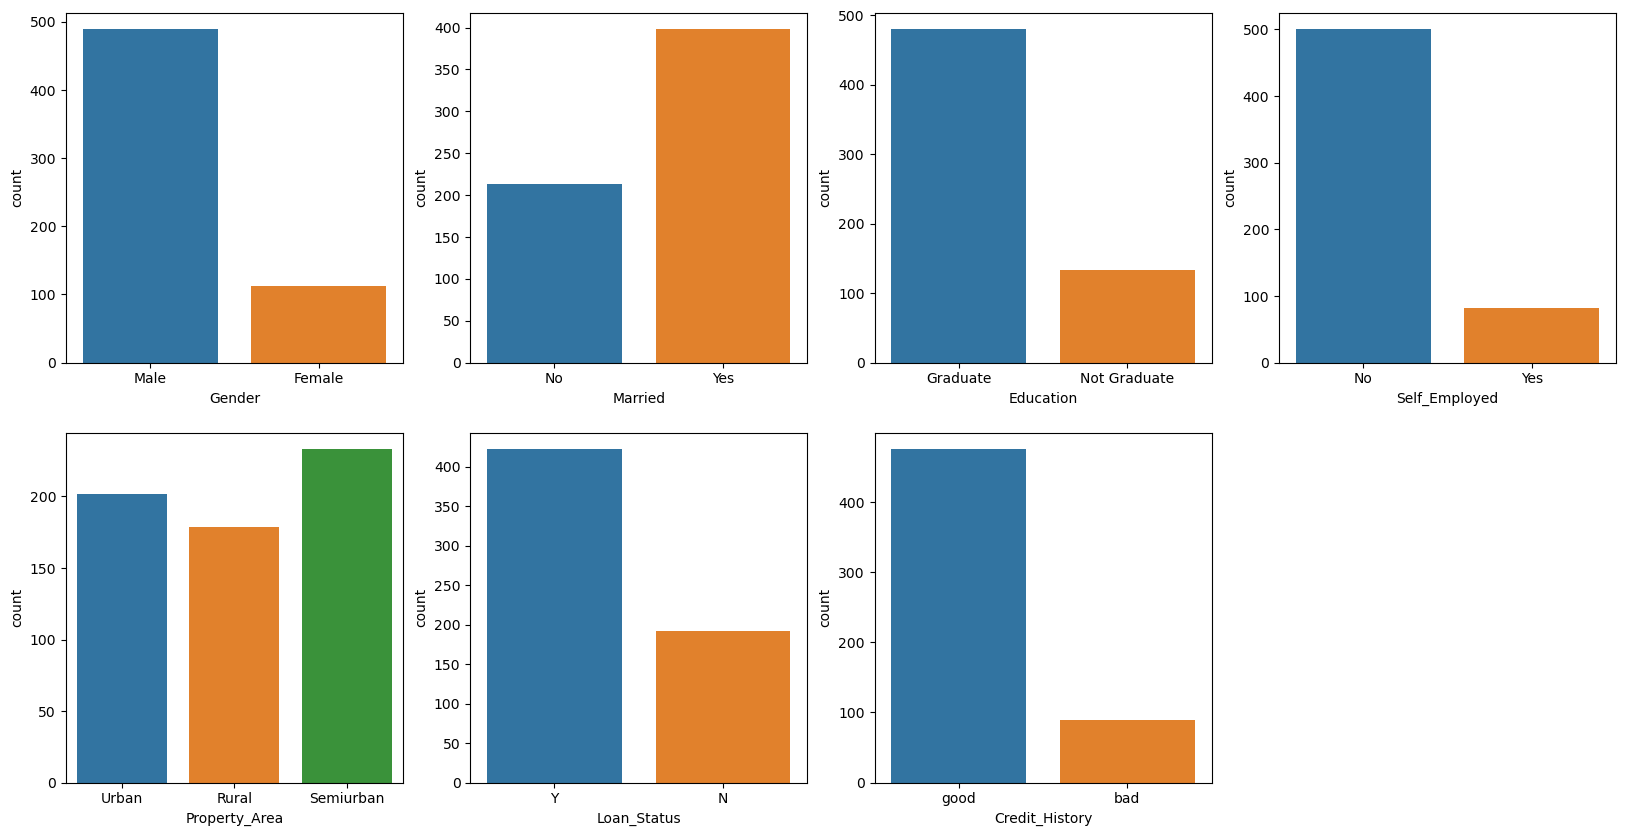

In [19]:
plt.figure(figsize=(20,10))
j = 1
for d_cat_col in descrit_catagorical.columns :
    plt.subplot(2,4,j)
    sns.countplot(x = df[d_cat_col] ) 
    j += 1
plt.show()

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
null_values = df.isnull().any(axis=1)
data_with_null_values = df[null_values]
len(data_with_null_values)

134

**Observation**

1. There a 3 data types :
    - object : Loan_ID Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
    - int : ApplicantIncome
    - float : CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History  
    - some columns required change in data type and one coloum we can creat of total income
            
            
2. There are 3 types of column Continous , Descrit_count and Descrit_catagorical.

3. In our dependent variable is having only 2 catagories yes and no.

4. There are several missing and dirty data in various columns.

5. Mean is greater then median in all the columns which means it's right skew data.

6. There is skewness so, we have to noemalize it also.

7. Coapplicant minimum value is zero , so while normalizing log may not be the best fit.

8. Total 134 missing values are there in dataset.

# Data Cleaning

In [22]:
df.drop('Loan_ID',axis=1,inplace=True)  # not require while modeling

In [23]:
# percentage of data missing from all the column in intire dataset
df.isnull().sum()*100/len(df)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [24]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome'].astype('int')

# Note : loan_Amount is depend on both applicant and coapplicant income 

In [25]:
df['Gender'].fillna('Male',inplace=True)                          # Replaced with mode

In [26]:
df['Married'].fillna('Yes',inplace=True)                          # Replaced with mode

In [27]:
df['Dependents'].fillna(0,inplace=True)                         # Replaced with mode
df['Dependents'].replace({'3+':3},inplace=True)                 # Treating Dirty data

In [28]:
df['Self_Employed'].fillna('No',inplace=True)                     # Replaced with mode

In [29]:
#df['LoanAmount'].dropna(inplace=True)
#df['Loan_Amount_Term'].dropna(inplace=True)
#df['Credit_History'].dropna(inplace=True)

df.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History'],inplace =True)

Note : For the null values in 'Lone_Amount','Loan_Amount_Term' and 'Credit_History' are not treatable and also there is no Data 
avilable for any correction so we have to drop it.





In [30]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,good,Rural,N,6091
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,good,Urban,Y,3000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,good,Urban,Y,4941
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,good,Urban,Y,6000
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,good,Urban,Y,9613


**Encoding**

In [32]:
df['Gender'] = df['Gender'].map({'Male':1 , 'Female':0})
df['Married'] = df['Married'].map({ 'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':0, 'Not Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({ 'Yes':1, 'No':0})
df['Property_Area'] = df[ 'Property_Area'].map({'Rural':0, 'Semiurban':1,'Urban':2})
df['Credit_History'] = df['Credit_History'].map({'good':1, 'bad':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

**Transform**

In [33]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype('int')
df['LoanAmount'] = df['LoanAmount'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

In [34]:
df[['Income', 'LoanAmount']].skew()

Income        5.777626
LoanAmount    2.607945
dtype: float64

In [35]:
from scipy.stats import boxcox
df['Income'], a = boxcox(df['Income'])
df['LoanAmount'], b = boxcox(df['LoanAmount'])

In [36]:
df[['Income','LoanAmount']].skew()

Income       -0.027768
LoanAmount    0.038289
dtype: float64

<Axes: xlabel='LoanAmount', ylabel='Count'>

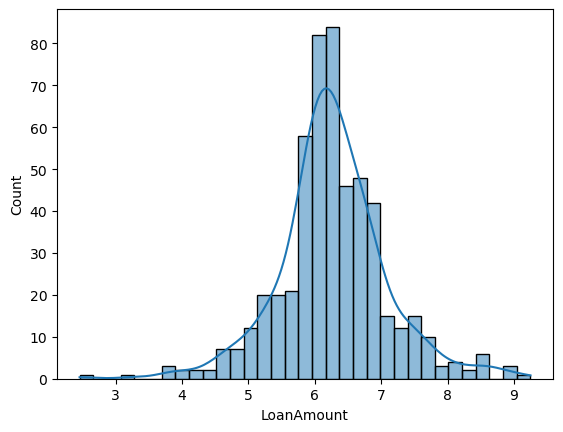

In [37]:
sns.histplot(x=df['LoanAmount'],kde=True)

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,0,0,4583,1508,6.243267,30.0,1,0,0,1.864973
2,1,1,0,0,1,3000,0,5.202610,30.0,1,2,1,1.856561
3,1,1,0,1,0,2583,2358,6.138816,30.0,1,2,1,1.862807
4,1,0,0,0,0,6000,0,6.401083,30.0,1,2,1,1.864825
5,1,1,2,0,1,5417,4196,7.481930,30.0,1,2,1,1.868937


 **Spliting the Data X & y**

In [39]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

# Modelling

**Finding Random State Number**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Train = []
Test = []
CV = []

for i in range(0,101) :
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    m = LogisticRegression()
    m.fit(X_train,y_train)
    
    ypred_train = m.predict(X_train)
    ypred_test = m.predict(X_test)
        
    Train.append(accuracy_score( y_train, ypred_train ))
    Test.append(accuracy_score( y_test, ypred_test))
    
    CV.append(cross_val_score(m,X_train,y_train,cv=5,scoring='accuracy').mean())
    
em = pd.DataFrame({'Train':Train,'Test':Test,'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <= 0.05)]
rs = gm[gm['CV'] == gm['CV'].max()].index.to_list()[0]
print('best_random_state_no._ :',rs)

best_random_state_no._ : 86


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=86)

In [42]:
# Logestic Regression

from sklearn.linear_model import LogisticRegression

log_r_model = LogisticRegression()
log_r_model.fit(X_train,y_train)

ypred_train_log_r = log_r_model.predict(X_train)
ypred_test_log_r = log_r_model.predict(X_test)

print('Train :',accuracy_score( y_train,ypred_train_log_r))
print('CV :', cross_val_score(log_r_model,X_train,y_train,cv=5).mean())
print('Test :',accuracy_score( y_test,ypred_test_log_r))

Train : 0.8203309692671394
CV : 0.8180392156862746
Test : 0.8018867924528302


In [43]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train_knn = knn_model.predict(X_train)
ypred_test_knn = knn_model.predict(X_test)

print('train accuracy :', accuracy_score(y_train,ypred_train_knn))
print('CV :',cross_val_score(knn_model,X_train,y_train,cv=5).mean())
print('test accuracy:', accuracy_score(y_test,ypred_test_knn))

train accuracy : 0.6855791962174941
CV : 0.6879551820728291
test accuracy: 0.6981132075471698


In [44]:
# # Support Vector 

# from sklearn.svm import SVC

# estimator = SVC() 
# param_grid = {'C':[0.01,1.0,1],'kernel':['linear','sigmoid','poly']}

# grid_svm = GridSearchCV(esthimator,param_grid,cv=5,scoring='accuracy')
# grid_svm.fit(X_train,y_train)

# svm_model = grid_svm.best_estimator_

# ypred_train_svm = svm_model.predict(X_train)
# ypred_test_svm =  svm_model.predict(X_test)

# print('train accuracy :',accuracy_score(y_train,ypred_train_svm))
# print('CV :',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())
# print('test accuracy :', accuracy_score(y_test,ypred_train_svm))

In [45]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,10))}

dt_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_
dt_fi = dt.feature_importances_

index  = [i for i,x in enumerate(dt_fi) if x > 0]

X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print('Train accuracy :',accuracy_score(y_train , ypred_train))
print('CV :',cross_val_score(dt,X_train_dt,y_train,cv = 5,scoring='accuracy').mean())
print('Test accuracy :',accuracy_score(y_test,ypred_test))





Train accuracy : 0.817966903073286
CV : 0.8180672268907564
Test accuracy : 0.8018867924528302


In [46]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=86)

In [47]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier 

estimator = RandomForestClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i,x in enumerate(rf_fi) if x > 0 ]

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print('Train Accuracy :',accuracy_score(y_train , ypred_train))
print('CV :',cross_val_score(rf,X_train_rf,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy :',accuracy_score(y_test, ypred_test))


Train Accuracy : 1.0
CV : 0.8085434173669468
Test Accuracy : 0.7924528301886793


In [48]:
# AdaBoost classifier

from sklearn.ensemble import AdaBoostClassifier

estimator = AdaBoostClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index = [i for i,x in enumerate(ab_fi) if x > 0 ]

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print('train accuracy :',accuracy_score(y_train, ypred_train))
print('CV :',cross_val_score(ab,X_train_ab,y_train,cv=5,scoring='accuracy').mean())
print('test accuracy :', accuracy_score(y_test, ypred_test))


train accuracy : 0.817966903073286
CV : 0.8180672268907564
test accuracy : 0.8018867924528302


In [49]:
# Gradian Boost Classifier 

from sklearn.ensemble import GradientBoostingClassifier

estimator = GradientBoostingClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,10)), 'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6]}

gb_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
gb_grid.fit(X_train, y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i,x in enumerate(gb_fi) if x > 0]

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)



print('Train Accuracy :',accuracy_score(y_train,ypred_train))
print('CV :',cross_val_score(gb,X_train_gb,y_train,cv=5,scoring='accuracy').mean())
print('Test Accuracy :',accuracy_score(y_test,ypred_test))


Train Accuracy : 0.8368794326241135
CV : 0.8085714285714285
Test Accuracy : 0.8018867924528302


In [59]:
# Xetream Gratient Boostinig

from xgboost import XGBClassifier

estimator = XGBClassifier(random_state=rs)
param_grid = {'n_estimators':[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.30,0.45]}

xgb_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_
             
index = [i for i,x in enumerate(xgb_fi) if x>0 ]

X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

xgb.fit(X_train_xgb ,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print('train accuracy :',accuracy_score(y_train,ypred_train))
print('CV :', cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring='accuracy').mean())
print('test accuracy :',accuracy_score(y_test,ypred_test))

train accuracy : 0.9219858156028369
CV : 0.8155742296918767
test accuracy : 0.7830188679245284
